# WSe2

In [1]:
import  pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, reshape, zeros, append, arange
import math
from math import log, e, pi
import numpy
from sys import argv

In [2]:
pi=numpy.pi
convert=29979245800.0*2*pi # cm^-1 to Hz

<function matplotlib.pyplot.show(close=None, block=None)>

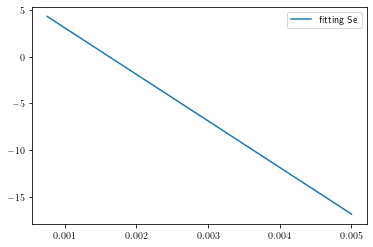

In [3]:
#xr=np.array(np.arange(473,1600,100))
xr=np.array(np.arange(199.85,1326.85,10))
xw=np.array(np.arange(2500,3300,10))
xr=1/xr
xw=1/xw
yr=(8.0886-(4989.5*xr))
yw=(7.933-(45087*xw))
plt.plot(xr,yr, label='fitting Se')
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

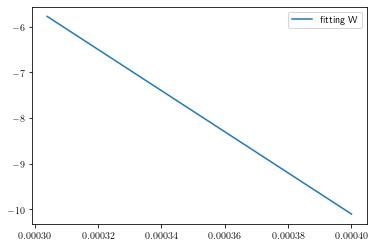

In [4]:
plt.plot(xw,yw, label='fitting W')
pS=np.exp(yr)*0.00131579 #mmhg to atm
pW=np.exp(yw)
#print(pS)
#print(pW)
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

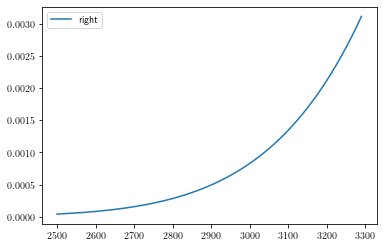

In [5]:


#print(pW)
plt.plot(1/xw,pW, label='right')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

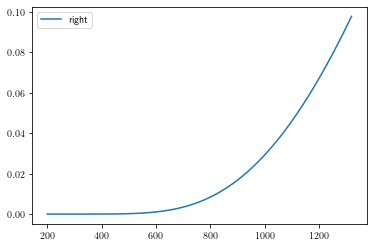

In [6]:

plt.plot(1/xr,pS, label='right')
plt.legend()
plt.show

# Formation energy as  chemical potential vary


In [7]:
d0=pd.read_csv('w0', sep='\s+',header=0)
d1=pd.read_csv('addS', sep='\s+',header=0)
d2=pd.read_csv('VS', sep='\s+',header=0)
d3=pd.read_csv('VS2', sep='\s+',header=0)
d4=pd.read_csv('VS22', sep='\s+',header=0)
d5=pd.read_csv('VW', sep='\s+',header=0)
dW=pd.read_csv('W_BCC', sep='\s+',header=0)
dSe=pd.read_csv('w_Se8', sep='\s+',header=0)
wS8=dSe['x']*convert
wW=dW['x']*convert # kj/mol to eV
w0=d0['w0']*convert
w1=d1['addS']*convert
w2=d2['VS']*convert
w3=d3['VS2']*convert
w4=d4['VS22']*convert
w5=d5['VW']*convert #THZ to 

 #### Total Energies in eV

In [8]:
E0=-14644858.463124419 # pristine
E1=-14711404.113635940 # addon S
E2=-14578308.639903018 # mono S vacancy
E3=-14511759.369944071 # di S vacancy up&down
E4=-14511758.944663303 # di S vacancy neighboring
E5=-14192151.211700918 # -14192151.211700918 mono Mo vacancy
E_WSe2=-585793.321771426 # primtitive
ES8=-532375.657399940   #8 atoms in unitcell
EW=-905397.333160509 # Total energy in eV

In [9]:
p01=1
T=1000
p=80928.077 # 1.89e-3 atm (atm to cgs * 1013250))
p0=1013250  # atm to g/(cm s^2) 
kk=1.380649e-16 # erg/k (cm^2.g/ks^2)
k=8.617333262145e-05 # ev/k
h=6.62607015e-27  # erg.s 
hb=6.582119569e-16 # eV.s
hbar=1.054571817e-27 # erg.s
sigma=8
m=1.04907603472e-21
IA=4.149045888664045e-37 
IB=4.149088585718857e-37
IC=7.612594467348306e-37

In [10]:
D=[]
E=[]

I=np.sqrt(IA)*np.sqrt(IB)*np.sqrt(IC)
A=np.log((((2*pi*m)**(3/2))*((kk*T)**(5/2)))/(p0*(h**3)))
B=np.log(np.sqrt(pi)/sigma)+ np.log((((8*pi*kk*T)/(h**2))**(3/2))*I)
temp=numpy.array([(np.log(1-math.exp(-(hbar*i)/(kk*T)))) for i in wS8])
C=np.sum(temp)
mu_0=-k*T*(A+B-C)
for i in pS:
       
        E.append(k*T*np.log(i/p01))
 
        
#
#print('E',E)
#print('mu_0', mu_0)
temp2=numpy.array([(hb*i)/(2) for i in wS8])
D=np.sum(temp2)
#print('D',D)
mu_S8=mu_0 + np.array(E) + D + ES8 
#print('mu_S8',mu_S8)

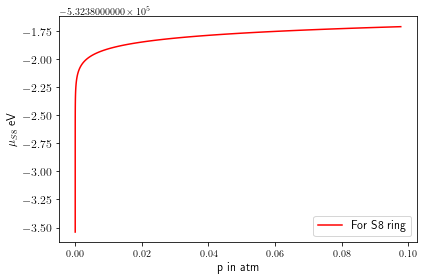

In [11]:
#p=arange(1.89e-3,1.89e+3,1)

plt.plot(pS,mu_S8, 'red', label='For S8 ring')
plt.xlabel('p in atm', fontsize=12)
plt.ylabel(r'$\mu_{S8}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

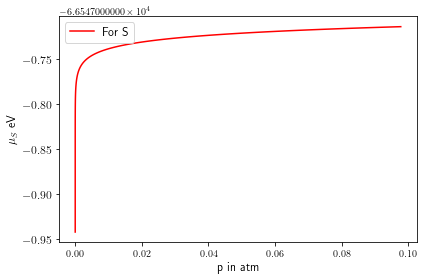

In [12]:
mu_S=array(mu_S8)/8
#p=arange(1.89e-3,1.89e+3,1)
plt.plot(pS,mu_S, 'red', label='For S')
plt.xlabel('p in atm', fontsize=12)
plt.ylabel(r'$\mu_S$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('muS_T.png',dpi=400)

In [13]:
def free_energy(omega):
   F=[]
  
   omega = numpy.array(omega)
   #for p in arange(1.89e-3,1.89e+3,e-1):
      
   temp3=numpy.array([(hb*i/2 + k*T*np.log(1-math.exp(-(hb*i)/(k*T)))) for i in omega])
   F.append(numpy.sum(temp3))


   return F

In [14]:
def DeltaF(X,Y):
   deltaF=[]
   F1=free_energy(X)
   F2=free_energy(Y)
   zip_object = zip(F1, F2)
   for i, j in zip_object:    
       deltaF.append(i-j)
   return deltaF 

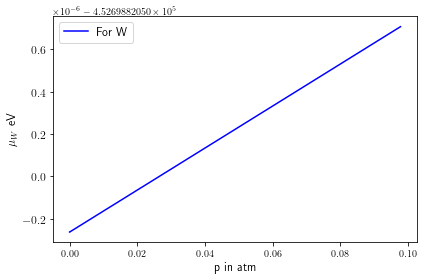

In [15]:
Fphon=free_energy(wW)
Fphon=np.array(Fphon)
#print(Fphon)
#print(EW)

V= 0.3133E+02 # volume of unitcell A^3
#print(pW*V*6.3242093e-07)
mu_W=[]
for i in pS:
       
        mu_W.append((1/2)*(EW+np.array((i*V*6.3242093e-07))+ Fphon))
 
#pp= 7.329633135876344e-05 # at 2000 k
#PV=pW*V*6.3242093e-07 # to eV
#mu_W=(1/2)*(EW+PV+ Fphon)

plt.plot(pS,mu_W, 'blue', label='For W')
#print(mu_W)
plt.xlabel('p in atm', fontsize=12)
plt.ylabel(r'$\mu_{W}$ eV', fontsize=12)
plt.legend(fontsize=12)
#plt.ylimit(-452698.820,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('muW_T.png',dpi=400)

In [16]:
addS = numpy.array([E1-E0-a + DeltaF(w1,w0) for a in (mu_S)])
VS =  numpy.array([E2-E0+a + DeltaF(w2,w0) for a in mu_S])
VS2 =  numpy.array([E3-E0+2*a + DeltaF(w3,w0) for a in mu_S])
VS22 =  numpy.array([E4-E0+2*a + DeltaF(w4,w0) for a in  mu_S])
VW =  numpy.array([E5-E0+a + DeltaF(w5,w0) for a in mu_W])


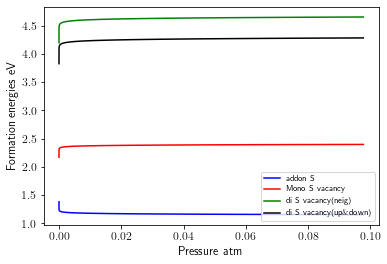

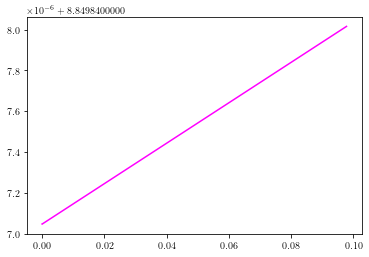

In [19]:
#p=arange(1.89e-3,1.89e+3,1)

plt.plot(pS, addS, 'b', label='addon S')
plt.plot(pS, VS, 'r', label='Mono S vacancy')
plt.plot(pS, VS22, 'g', label='di S vacancy(neig)') 
plt.plot(pS, VS2, 'k', label=r'di S vacancy(up$\&$down)')
#plt.plot(pS, VW, 'magenta', label='Mono W vacany') 
plt.xlabel('Pressure atm', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
plt.legend(loc='lower right',fontsize=8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Ef_p.png',dpi=400)
plt.show()
plt.plot(pS, VW, 'magenta', label='Mono W vacany') 
plt.show()
#print(addS)

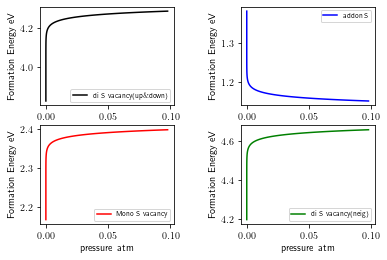

In [18]:
fig, axs = plt.subplots(2, 2)
#p=arange(1.89e-3,1.89e+3,1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2)
#axs[0, 0].plot(pS, VW, 'magenta', label='Mono W vacany')

axs[0, 1].plot(pS, addS, 'b', label='addon S')
axs[0, 1].legend(fontsize=7)
axs[1, 0].plot(pS, VS, 'r', label='Mono S vacancy')
axs[1, 0].legend(fontsize=7)
axs[1, 1].plot(pS, VS22, 'g', label='di S vacancy(neig)')
axs[0, 0].plot(pS, VS2, 'k', label=r'di S vacancy(up$\&$down)')
axs[1, 1].legend(fontsize=7)
axs[0, 0].legend(fontsize=7)
for ax in axs.flat:
    ax.set(xlabel='pressure atm', ylabel='Formation Energy eV')

plt.savefig('Ef_2_p.png',dpi=400)  